In [1]:
#set up the directory

import os
os.chdir("C:/Users/Windows 10/.spyder-py3/lavoro algoritmi")

In [2]:
#set up the dataframe

import pandas
colnames = ["CustomerID", "Gender", "Age", "Annual_income", "Spending_score"]
data = pandas.read_csv("Mall_customers.csv", names=colnames, sep=";")


income=data.Annual_income.tolist()
score=data.Spending_score.tolist()

from sklearn.metrics import silhouette_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'x': income,
    'y': score
})

np.random.seed(178)

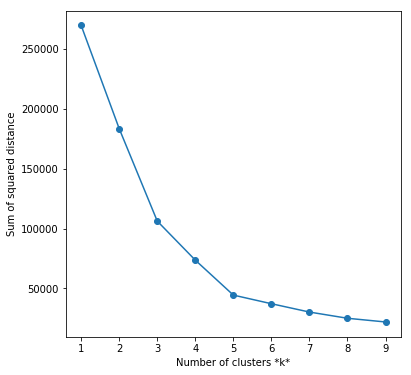

In [3]:

#ELBOW METHOD for the number of clusters
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [4]:
#SILHOUETTE METHOD for number of clusters


#Use silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)


for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.2968969162503008)
For n_clusters = 3, silhouette score is 0.46761358158775435)
For n_clusters = 4, silhouette score is 0.4931963109249047)
For n_clusters = 5, silhouette score is 0.553931997444648)
For n_clusters = 6, silhouette score is 0.5379675585622219)
For n_clusters = 7, silhouette score is 0.5288104473798049)
For n_clusters = 8, silhouette score is 0.4563394686110682)
For n_clusters = 9, silhouette score is 0.45977797620553973)


0.0010035037994384766


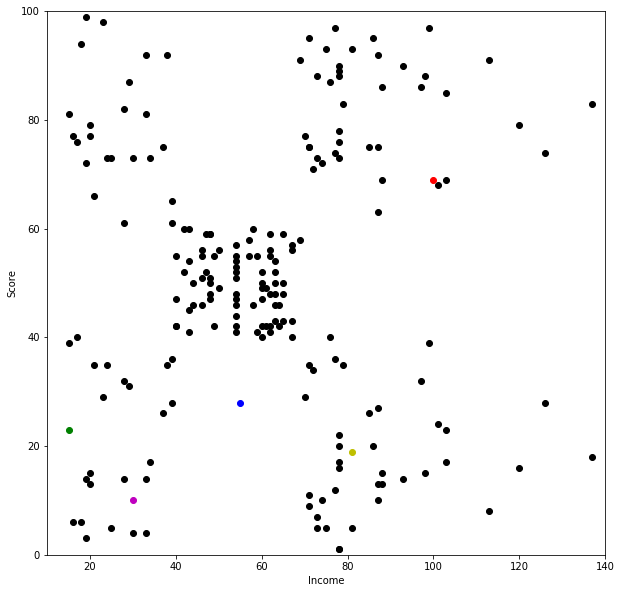

In [5]:
#starting the kmeans for num_clusters=5
k = 5
import time
start = time.time()

#setting up the centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(15, 137), np.random.randint(1,99)]
    for i in range(k)
}

end = time.time()
print(end - start)   
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b',4:"y",5:"m",6:"c"}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(10, 140)
plt.ylim(0, 100)
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

0.057996511459350586
    x   y  distance_from_1  distance_from_2  distance_from_3  distance_from_4  \
0  15  39        90.138782        16.000000        41.484937        68.963759   
1  15  81        85.842880        58.000000        66.400301        90.553851   
2  16   6       105.000000        17.029386        44.777226        66.287254   
3  16  77        84.380092        54.009258        62.625873        87.114867   
4  17  40        87.920419        17.117243        39.849718        67.357256   

   distance_from_5  closest color  
0        32.649655        2     g  
1        72.567210        2     g  
2        14.560220        5     m  
3        68.447060        2     g  
4        32.695565        2     g  


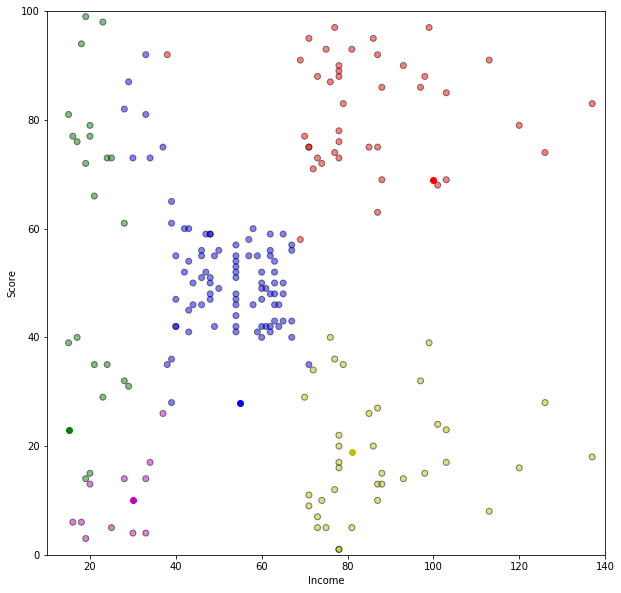

In [6]:
#function for assigning each observation to the nearest centroid
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

import time
start = time.time()
df = assignment(df, centroids)
end = time.time()
print(end - start)
print(df.head())


fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(10, 140)
plt.ylim(0, 100)
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()


0.010003805160522461


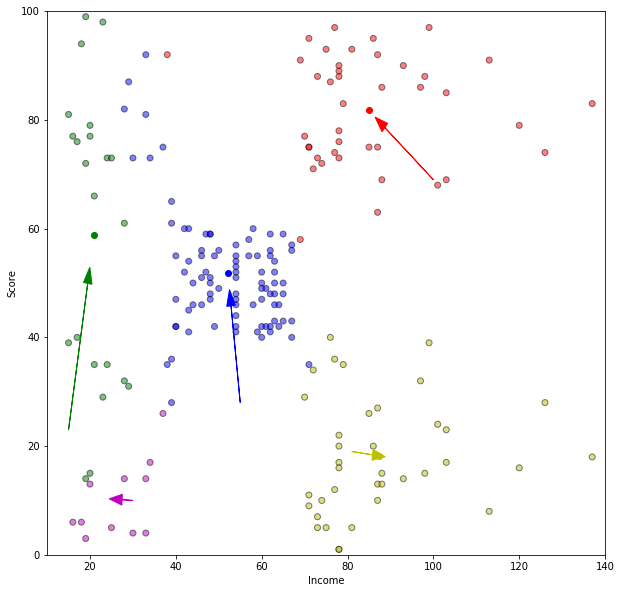

In [7]:

# Updating the centroids based on the current partition

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

import time
start = time.time()
centroids = update(centroids)

end = time.time()
print(end - start)  

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(10, 140)
plt.ylim(0, 100)
plt.xlabel("Income")
plt.ylabel("Score")
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()


0.020945072174072266


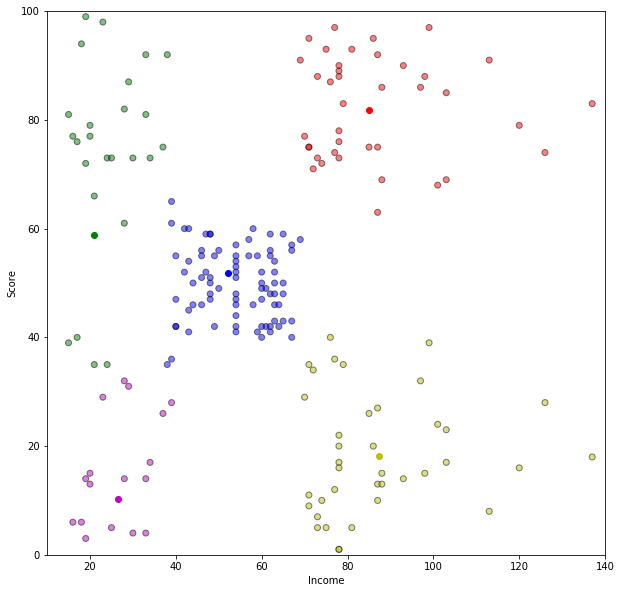

In [8]:
#assign again the observations to the closest centroids
import time
start = time.time()

df = assignment(df, centroids)
end = time.time()
print(end - start)

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(10, 140)
plt.ylim(0, 100)
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()


0.06624579429626465


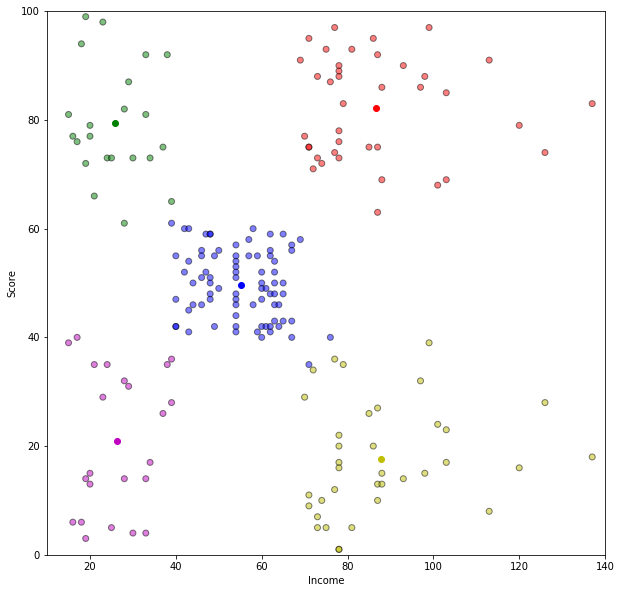

In [9]:
# Continue until all assigned categories don't change any more

import time
start = time.time()

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
end = time.time()
print(end - start)
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(10, 140)
plt.ylim(0, 100)
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()
